<a href="https://colab.research.google.com/github/AnanyaTayalSC/Final_ones/blob/main/Epoch%3D20%2CLR%3D0.001%2CCL%3D10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy numpy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import scipy.io
import pandas as pd


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras import layers, models

# -----------------------------
# 1) Load Excel
# -----------------------------
#df = pd.read_excel("AItable.xlsx")

# Define the path to your CSV file
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/Thesis')
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/AI_FCW1.csv'

# Load the CSV file into a pandas DataFrame
# parse_dates tells pandas to convert the 'Date' column to datetime objects
# index_col sets the 'Date' column as the DataFrame's index, which is crucial for time series
df = pd.read_csv(csv_file_path)

# If each row is a scenario (time series)
X = df.values   # shape (1359, timesteps)
X = np.expand_dims(X, axis=-1)   # (1395, timesteps, 1)

print("Data shape:", X.shape)

# -----------------------------
# 2) LSTM Autoencoder
# -----------------------------
n_scenarios, timesteps, n_features = X.shape
latent_dim = 64

inputs = layers.Input(shape=(timesteps, n_features))
encoded = layers.LSTM(128, return_sequences=True)(inputs)
encoded = layers.LSTM(latent_dim)(encoded)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(128, return_sequences=True)(decoded)
outputs = layers.TimeDistributed(layers.Dense(n_features))(decoded)

#outputs = layers.TimeDistributed(layers.Dense(n_features, activation="sigmoid"))(decoded)

autoencoder = models.Model(inputs, outputs)
encoder = models.Model(inputs, encoded)

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X, X, epochs=10, batch_size=64, verbose=1)

# -----------------------------
# 3) Extract embeddings
# -----------------------------
embeddings = encoder.predict(X)

# -----------------------------
# 4) Cluster
# -----------------------------
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings)
labels = kmeans.labels_

#score = silhouette_score(embeddings, labels)
print("Silhouette Score:", score)
print("Cluster labels for first 10 series:", labels[:10])
print(labels)

Data shape: (13921, 484, 1)
Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 690s 3s/step - loss: 11.7155
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 649s 3s/step - loss: 10.5486
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 662s 3s/step - loss: 8.7210
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 661s 3s/step - loss: 8.6299
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 661s 3s/step - loss: 8.7163
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - loss: 8.5974
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 640s 3s/step - loss: 8.7647
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 667s 3s/step - loss: 8.6180
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - loss: 8.5995
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 630s 3s/step - loss: 8.6802
436/436 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step
Silhouette Score: 0.9992181
Cluster labels for first 10 series: [0 0 0 0 0 0 0 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
#autoencoder.save("autoencoder_model.h5")
# Save autoencoder
autoencoder.save('autoencoder_model32ep30.h5')

# Save encoder separately
encoder.save('encoder_model32ep30.h5')

from tensorflow.keras.models import load_model

autoencoder = load_model('autoencoder_model64.h5')
encoder = load_model('encoder_model64.h5')


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

autoencoder = load_model('autoencoder_model64.h5', custom_objects={'mse': MeanSquaredError()})

from tensorflow import keras

autoencoder = keras.models.load_model("autoencoder_model.keras")
encoder = keras.models.load_model("encoder_model.keras")

In [ ]:
# Save weights
autoencoder.save_weights("autoencoder_weights.weights.h5")

# Load weights later (need same architecture built first)
autoencoder.load_weights("autoencoder_weights.weights.h5")


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings)
labels = kmeans.labels_

np.set_printoptions(threshold=np.inf)  # disable truncation
print(labels)

score = silhouette_score(embeddings, labels)
print("Silhouette Score:", score)
print("Cluster labels for first 10 series:", labels[:10])


print("Embeddings shape:", embeddings.shape)   # should be (1329, latent_dim)
print("First few embeddings:\n", embeddings[:5])
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

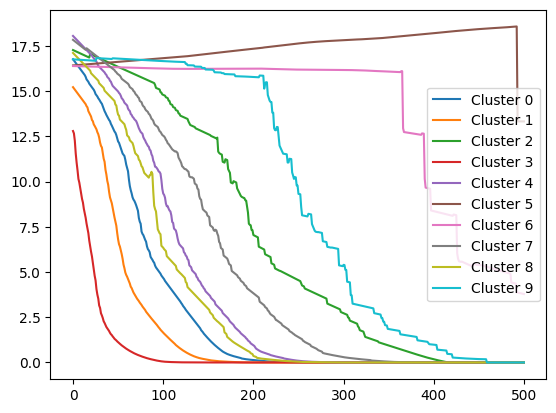

In [ ]:
cluster_means = []
for c in np.unique(labels):
    cluster_means.append(X[labels == c].mean(axis=0).squeeze())
cluster_means = np.array(cluster_means)

import matplotlib.pyplot as plt
for i, mean in enumerate(cluster_means):
    plt.plot(mean, label=f"Cluster {i}")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


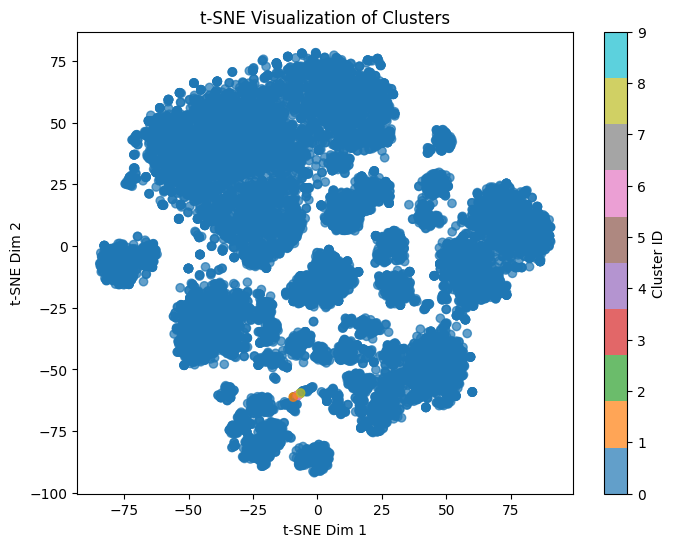

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce embeddings (high-dim) → 2D with t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,
    cmap="tab10",
    alpha=0.7
)

plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the autoencoder
autoencoder = load_model("autoencoder_model64.h5")

# If you saved encoder separately
encoder = load_model("encoder_model.h5")


To load the encoder form saved autoencoder
Maybe I should save encoder as well.

In [ ]:

from tensorflow.keras import Model

# input is still the first layer
encoder_input = autoencoder.input

# "encoded" was the second LSTM (index depends on your architecture)
encoder_output = autoencoder.layers[2].output

# build encoder again
encoder = Model(encoder_input, encoder_output)

# now you can get embeddings
embeddings = encoder.predict(X)


44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 380ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


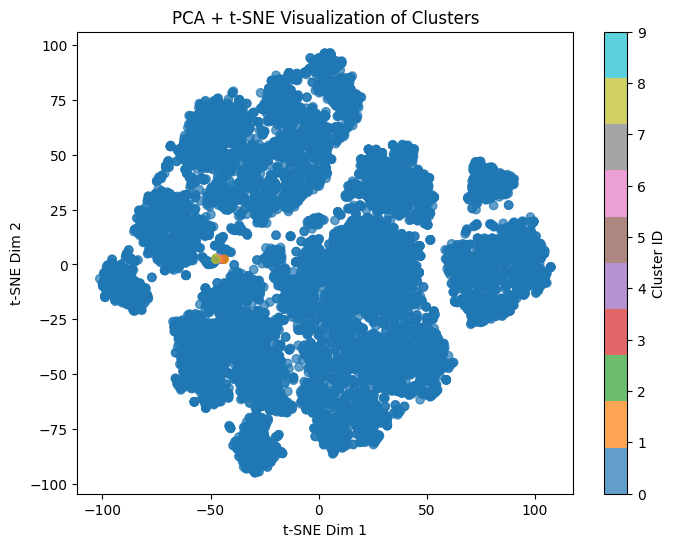

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Reduce dimensionality with PCA first (e.g., 64D → 20D)
pca = PCA(n_components=20, random_state=0)
embeddings_pca = pca.fit_transform(embeddings)

# Step 2: Apply t-SNE on PCA-reduced embeddings
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings_pca)

# Step 3: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,   # cluster/class labels
    cmap="tab10",
    alpha=0.7
)
plt.title("PCA + t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1) Load CSV
# -----------------------------
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/AI_FCW1.csv'
df = pd.read_csv(csv_file_path, header=None)

# Convert to float and handle NaNs
X = df.values.astype(np.float32)
X = np.nan_to_num(X, nan=0.0)  # replace NaNs with 0

# -----------------------------
# 2) Pad sequences if needed
# -----------------------------
# Here, we assume all sequences are already equal length in CSV.
# If not, you can use pad_sequences from keras.preprocessing.sequence

X = np.expand_dims(X, axis=-1)   # shape (n_scenarios, timesteps, 1)

# -----------------------------
# 3) LSTM Autoencoder
# -----------------------------
n_scenarios, timesteps, n_features = X.shape
latent_dim = 64

inputs = layers.Input(shape=(timesteps, n_features))
x = layers.Masking(mask_value=0)(inputs)           # mask padded zeros
x = layers.LSTM(128, return_sequences=True)(x)       # first LSTM
encoded = layers.LSTM(latent_dim)(x)                 # second LSTM (embedding)

x = layers.RepeatVector(timesteps)(encoded)
x = layers.LSTM(128, return_sequences=True)(x)
outputs = layers.TimeDistributed(layers.Dense(n_features))(x)

autoencoder = models.Model(inputs, outputs)
encoder = models.Model(inputs, encoded)

optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')
#autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=20, batch_size=32, verbose=1)

# -----------------------------
# 4) Extract embeddings
# -----------------------------
embeddings = encoder.predict(X)

# Optional: scale embeddings before clustering
embeddings_scaled = StandardScaler().fit_transform(embeddings)

# -----------------------------
# 5) Cluster embeddings
# -----------------------------
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings_scaled)
labels = kmeans.labels_

print("Embeddings shape:", embeddings.shape)
print("Cluster counts:", pd.Series(labels).value_counts())


Epoch 1/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - loss: 9.6089
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - loss: 4.8263
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 2.7168
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 2.0811
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - loss: 1.8909
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - loss: 1.6633
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.3984
Epoch 8/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.4742
Epoch 9/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.3496
Epoch 10/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.2202
Epoch 11/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.1155
Epoch 12/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - loss: 1.0737
Epoch 13/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.3236
Epoch 14/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - loss: 1.0959
Epoch 15/20
436/436 ━━━━━━━━

In [29]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings_scaled)
labels = kmeans.labels_

print("Embeddings shape:", embeddings.shape)
print("Cluster counts:", pd.Series(labels).value_counts())

Embeddings shape: (13922, 64)
Cluster counts: 5    3567
9    3182
1    2898
2    1276
8     820
0     751
3     729
6     523
4     161
7      15
Name: count, dtype: int64


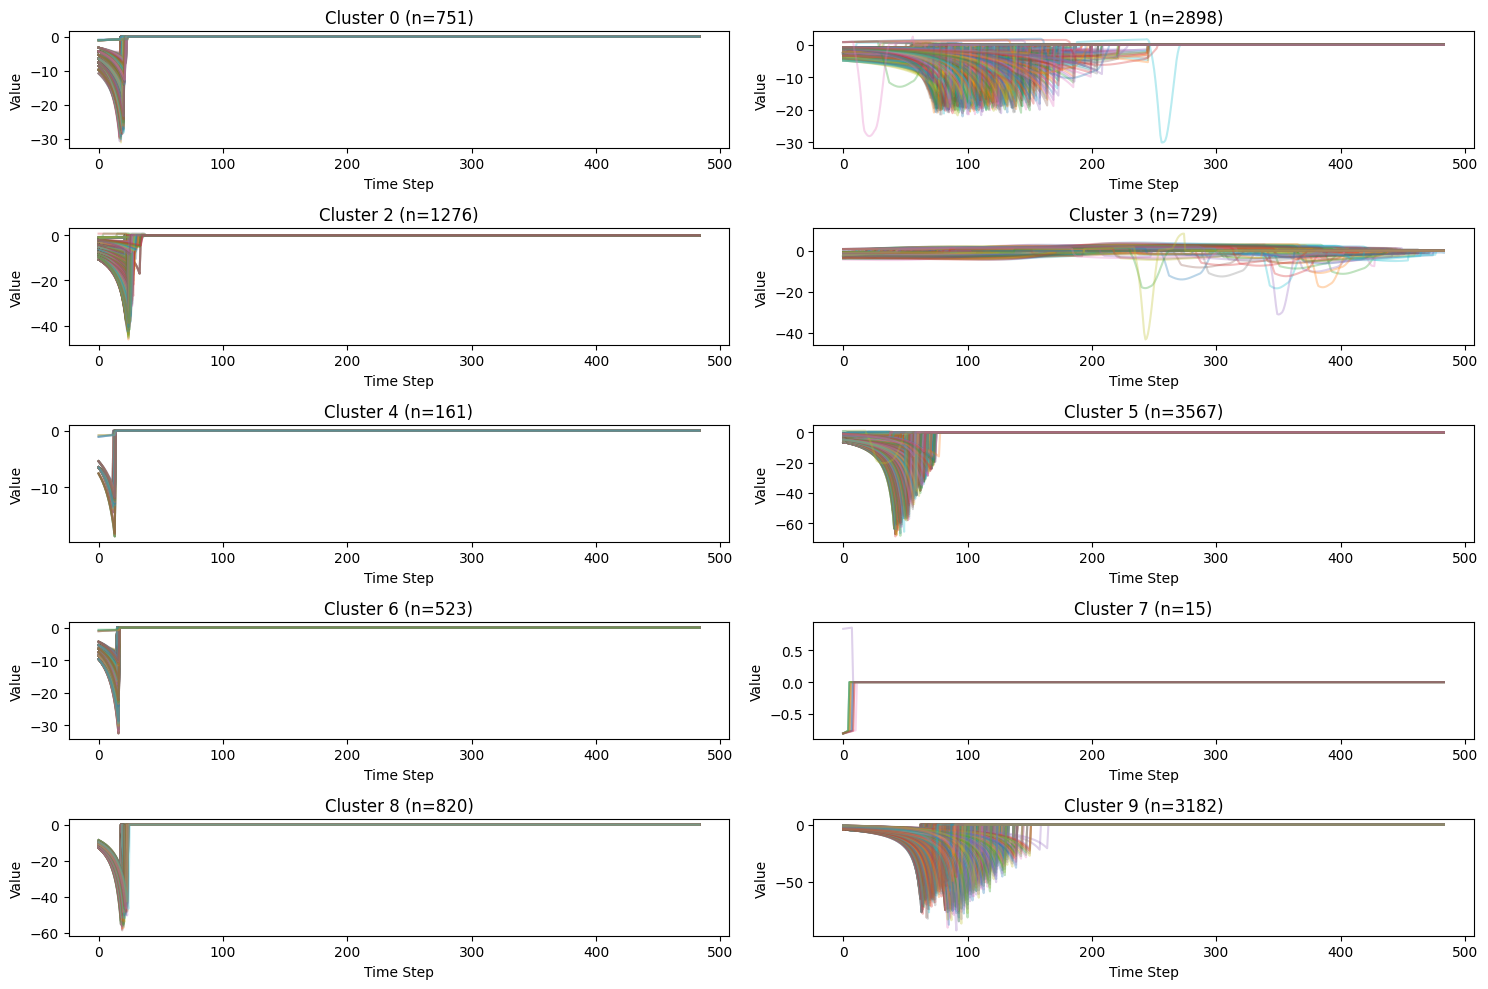

In [30]:
import matplotlib.pyplot as plt

num_clusters = len(np.unique(labels))
plt.figure(figsize=(15, 10))

for cluster in range(num_clusters):
    cluster_indices = np.where(labels == cluster)[0]
    plt.subplot((num_clusters + 1)//2, 2, cluster + 1)

    for idx in cluster_indices:
        plt.plot(X[idx], alpha=0.3)  # plot each time series in this cluster

    plt.title(f'Cluster {cluster} (n={len(cluster_indices)})')
    plt.xlabel('Time Step')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [31]:
print(n_scenarios)
print(df)

13922
            0         1         2         3         4         5         6    \
0     -6.475236 -6.662674 -6.865021 -7.084118 -7.322120 -7.581570 -7.865486   
1     -3.237617 -3.263766 -3.290829 -3.318854 -3.347891 -3.377994 -3.409221   
2     -2.158426 -2.161246 -2.164125 -2.167063 -2.170064 -2.173128 -2.176258   
3     -1.618826 -1.615517 -1.612160 -1.608756 -1.605304 -1.601802 -1.598250   
4     -6.475236 -6.662674 -6.865021 -7.084118 -7.322120 -7.581570 -7.865486   
...         ...       ...       ...       ...       ...       ...       ...   
13917 -0.780665 -0.810264 -0.840493 -0.871373 -0.902926 -0.935174 -0.968140   
13918 -2.158414 -2.273004 -2.392765 -2.518087 -2.649403 -2.787187 -2.931968   
13919 -1.079210 -1.128629 -1.179422 -1.231652 -1.285386 -1.340696 -1.397657   
13920 -0.782593 -0.815199 -0.848538 -0.882638 -0.917525 -0.953227 -0.989776   
13921 -0.788274 -0.815975 -0.844255 -0.873133 -0.902627 -0.932758 -0.963545   

            7         8         9    ...  474

In [32]:
np.set_printoptions(threshold=np.inf)  # disable truncation
print(labels)

[4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4
 5 1 1 4 5 1 5 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5
 1 1 4 5 3 1 4 5 3 1 4 5 3 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1
 1 4 5 1 1 4 5 1 3 4 5 1 1 4 5 3 1 4 5 3 3 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1
 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 3 4 5 1 3 4 5 3 3 4 5 5 1 4 5 5 1 4
 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 1 1 4 5 1 1 4 5 1 1 4 5 1 3 4 5 1 3 4 5
 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 1 1 4 5 1 1 4 5 1
 1 4 5 1 3 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1
 4 5 1 1 4 5 1 1 4 5 1 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4
 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 1 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5
 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 9 4 5 5 9 4 5 5
 9 4 5 5 9 4 5 5 9 4 5 5 9 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 5 5 1 4 2 5 5
 4 2 5 5 4 2 5 5 4 2 5 5 4 2 5 5 4 2 5 5 4 5 5 9 4 5 5 9 4 5 5 9 4 5 5 9 4
 5 5 1 6 5 1 1 6 5 1 1 6 

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


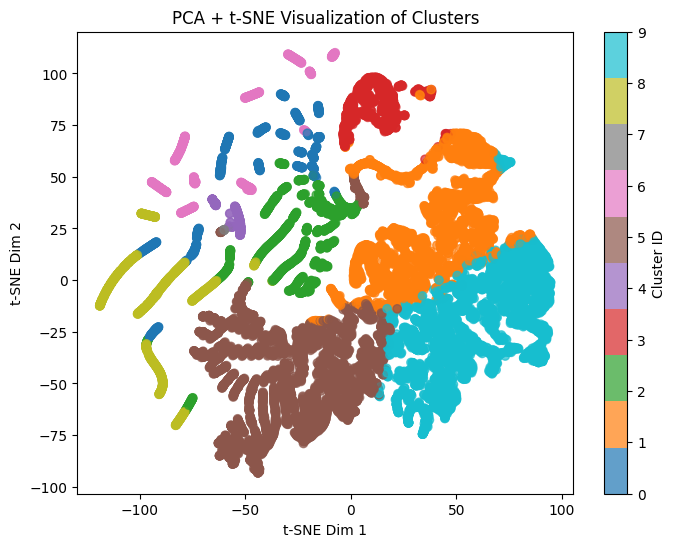

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Reduce dimensionality with PCA first (e.g., 64D → 20D)
pca = PCA(n_components=20, random_state=0)
embeddings_pca = pca.fit_transform(embeddings)

# Step 2: Apply t-SNE on PCA-reduced embeddings
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings_pca)

# Step 3: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,   # cluster/class labels
    cmap="tab10",
    alpha=0.7
)
plt.title("PCA + t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
scores = {}
for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=0).fit(embeddings_scaled)
    scores[k] = silhouette_score(embeddings_scaled, km.labels_)
print(scores)


{2: np.float32(0.513285), 3: np.float32(0.49790865), 4: np.float32(0.47964182), 5: np.float32(0.32115477), 6: np.float32(0.3145848), 7: np.float32(0.324639), 8: np.float32(0.32353717), 9: np.float32(0.326918), 10: np.float32(0.3259518), 11: np.float32(0.3295894), 12: np.float32(0.33167988), 13: np.float32(0.3391559), 14: np.float32(0.3400274), 15: np.float32(0.33292985)}


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1) Load CSV
# -----------------------------
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/AI_FCW1.csv'
df = pd.read_csv(csv_file_path)


In [22]:
import numpy as np

np.save('/content/drive/MyDrive/Colab Notebooks/Thesis/embeddings.npy', embeddings_scaled)


In [23]:
embeddings_scaled = np.load('/content/drive/MyDrive/Colab Notebooks/Thesis/embeddings.npy')
